<a href="https://colab.research.google.com/github/zahraDehghanian97/pneumonia_dignosis/blob/master/Practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Intelligent Analysis of
Biomedical Images - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2022

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline:  Aban 16
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data


In [49]:
# Set your student number
student_number = 401300417
Name = 'Zahra'
Last_Name = 'Dehghanian'

# A) Preprocess (5 points):

Import the libraries.


In [50]:
!pip install tf-explain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
import pandas as pd       
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import warnings
warnings.filterwarnings('ignore')
import random
import os
import glob
from numpy.random import seed
from tensorflow.random import set_seed
seed(42)
random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(42)

First mount to your Colab.

In [52]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [53]:
 ! pip install -q kaggle

In [54]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Now download the dataset from [here](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia), and upload them to the same folder as this Google Colab is located. (1 point)

In [55]:
# download dataset <owner>/<dataset-name>
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [56]:
!unzip /content/chest-xray-pneumonia.zip

Archive:  /content/chest-xray-pneumonia.zip
replace chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


Load the data. (1 point)

Hint: See this [link](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

In [57]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [92]:
main_path = "/content/chest_xray/chest_xray"
train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")
val_path=os.path.join(main_path,"val")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")
test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")
val_normal = glob.glob(val_path+"/NORMAL/*.jpeg")
val_pneumonia = glob.glob(val_path+"/PNEUMONIA/*.jpeg")

In [59]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])
df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])
df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

val_list = [x for x in val_normal]
val_list.extend([x for x in val_pneumonia])
df_val = pd.DataFrame(np.concatenate([['Normal']*len(val_normal) , ['Pneumonia']*len(val_pneumonia)]), columns = ['class'])
df_val['image'] = [x for x in val_list]



In [60]:
df = df_train.sample(frac=0.05)
df_train, df_val = train_test_split(df, test_size = 0.20, random_state = SEED, stratify = df['class'])

Make the data ready for the training. Use data augmentation and transformation. (3 points)

Hint: see this [link](https://pytorch.org/vision/stable/transforms.html).

In [61]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(df_train,
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(df_val,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)



Found 208 validated image filenames belonging to 2 classes.
Found 53 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


In [62]:
val_df_1 = val_datagen.flow_from_dataframe(df_val,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            seed = SEED)

Found 53 validated image filenames belonging to 2 classes.


In [63]:
val = []
for i in range(len(val_df_1.labels)):
  val.append(val_df_1.next()[0][0])
val

[array([[[0.21960786, 0.21960786, 0.21960786],
         [0.25882354, 0.25882354, 0.25882354],
         [0.28627452, 0.28627452, 0.28627452],
         ...,
         [0.32941177, 0.32941177, 0.32941177],
         [0.34509805, 0.34509805, 0.34509805],
         [0.3529412 , 0.3529412 , 0.3529412 ]],
 
        [[0.2509804 , 0.2509804 , 0.2509804 ],
         [0.27058825, 0.27058825, 0.27058825],
         [0.30588236, 0.30588236, 0.30588236],
         ...,
         [0.34901962, 0.34901962, 0.34901962],
         [0.35686275, 0.35686275, 0.35686275],
         [0.35686275, 0.35686275, 0.35686275]],
 
        [[0.22352943, 0.22352943, 0.22352943],
         [0.2627451 , 0.2627451 , 0.2627451 ],
         [0.27058825, 0.27058825, 0.27058825],
         ...,
         [0.35686275, 0.35686275, 0.35686275],
         [0.3529412 , 0.3529412 , 0.3529412 ],
         [0.3647059 , 0.3647059 , 0.3647059 ]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.     

# B) Model (25 + 5 points):

Implement the model. (5 points)
You can read about the residual neural networks in this [paper] (https://arxiv.org/abs/1512.03385).


In [64]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():
    
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)
    
    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)
    
    model = keras.Model(inputs=[inputs], outputs=output)
    
    return model

In [65]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

Describe what the advantages of this network are over the other others. (5 points)

1. this network get acceptable result in this task in compare to others(paperswithcodes)
2. it is really easy to use
3. pretrained model can be find and use very simple 

Train the model. (5 points)

In [66]:
from tf_explain.callbacks.grad_cam import GradCAMCallback

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,                                     
    patience = 2,                                   
    min_delt = 1e-7,                                
    cooldown = 0,                               
    verbose = 1
) 
gradcam =     GradCAMCallback(
        validation_data=(val, val_df_1.labels),
        layer_name="input_1",
        class_index= 0,
        output_dir='content',
    )

In [67]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],#,gradcam],
          steps_per_epoch=(float(len(df_train)/BATCH)),
          validation_steps=(float(len(df_val)/BATCH)));

Epoch 1/50
6/6 [==============================] - 24s 2s/step - loss: 0.6642 - binary_accuracy: 0.6394 - val_loss: 0.5625 - val_binary_accuracy: 0.6981 - lr: 5.0000e-05
Epoch 2/50
6/6 [==============================] - 7s 1s/step - loss: 0.6179 - binary_accuracy: 0.6394 - val_loss: 0.4841 - val_binary_accuracy: 0.8113 - lr: 5.0000e-05
Epoch 3/50
6/6 [==============================] - 7s 1s/step - loss: 0.5273 - binary_accuracy: 0.7500 - val_loss: 0.4292 - val_binary_accuracy: 0.8113 - lr: 5.0000e-05
Epoch 4/50
6/6 [==============================] - 8s 1s/step - loss: 0.4688 - binary_accuracy: 0.7885 - val_loss: 0.3865 - val_binary_accuracy: 0.8302 - lr: 5.0000e-05
Epoch 5/50
6/6 [==============================] - 7s 1s/step - loss: 0.4204 - binary_accuracy: 0.8173 - val_loss: 0.3457 - val_binary_accuracy: 0.8679 - lr: 5.0000e-05
Epoch 6/50
6/6 [==============================] - 9s 2s/step - loss: 0.3887 - binary_accuracy: 0.8606 - val_loss: 0.3146 - val_binary_accuracy: 0.9057 - lr: 5.

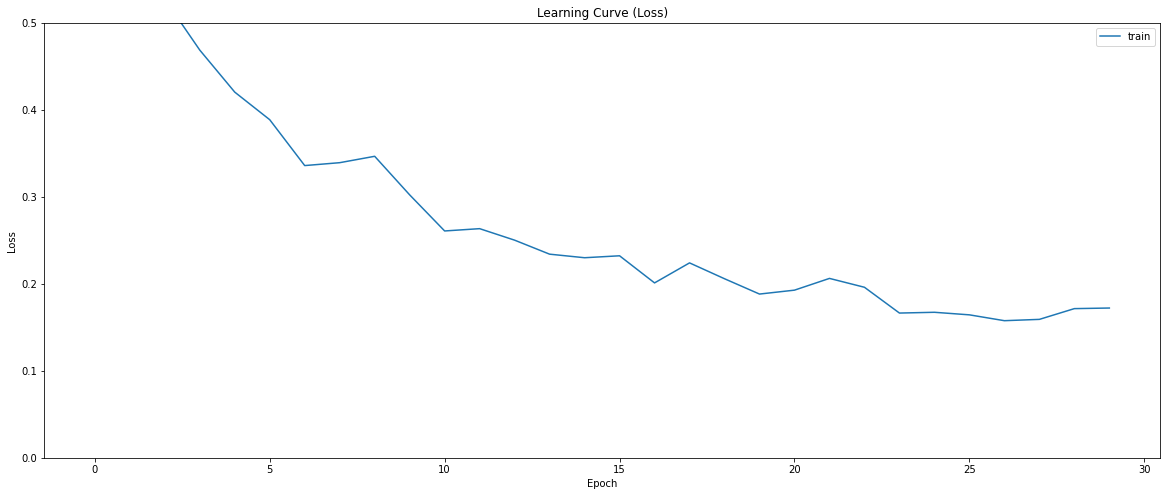

In [68]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
# sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [69]:
score = model_pretrained.evaluate(ds_val, steps = len(df_val)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.1469249129295349
Val accuracy: 0.9245283007621765


In [70]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5018755793571472
Test accuracy: 0.7676281929016113


Use transfer leaning. (5 points)

Fine Tuning

In [71]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-20]:
    layer.trainable = False

In [72]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [73]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 50,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(df_train)/BATCH),
          validation_steps=(len(df_val)/BATCH));

Epoch 1/50
6/6 [==============================] - 9s 1s/step - loss: 0.1584 - binary_accuracy: 0.9519 - val_loss: 0.1466 - val_binary_accuracy: 0.9245 - lr: 2.0000e-06
Epoch 2/50
6/6 [==============================] - 7s 1s/step - loss: 0.1702 - binary_accuracy: 0.9567 - val_loss: 0.1467 - val_binary_accuracy: 0.9245 - lr: 2.0000e-06
Epoch 3/50
7/6 [================================] - ETA: 0s - loss: 0.1665 - binary_accuracy: 0.9615
Epoch 3: ReduceLROnPlateau reducing learning rate to 3.999999989900971e-07.
6/6 [==============================] - 7s 1s/step - loss: 0.1665 - binary_accuracy: 0.9615 - val_loss: 0.1469 - val_binary_accuracy: 0.9245 - lr: 2.0000e-06
Epoch 4/50
6/6 [==============================] - 7s 1s/step - loss: 0.1667 - binary_accuracy: 0.9567 - val_loss: 0.1470 - val_binary_accuracy: 0.9245 - lr: 4.0000e-07
Epoch 5/50
7/6 [================================] - ETA: 0s - loss: 0.2007 - binary_accuracy: 0.9279
Epoch 5: ReduceLROnPlateau reducing learning rate to 8.000000

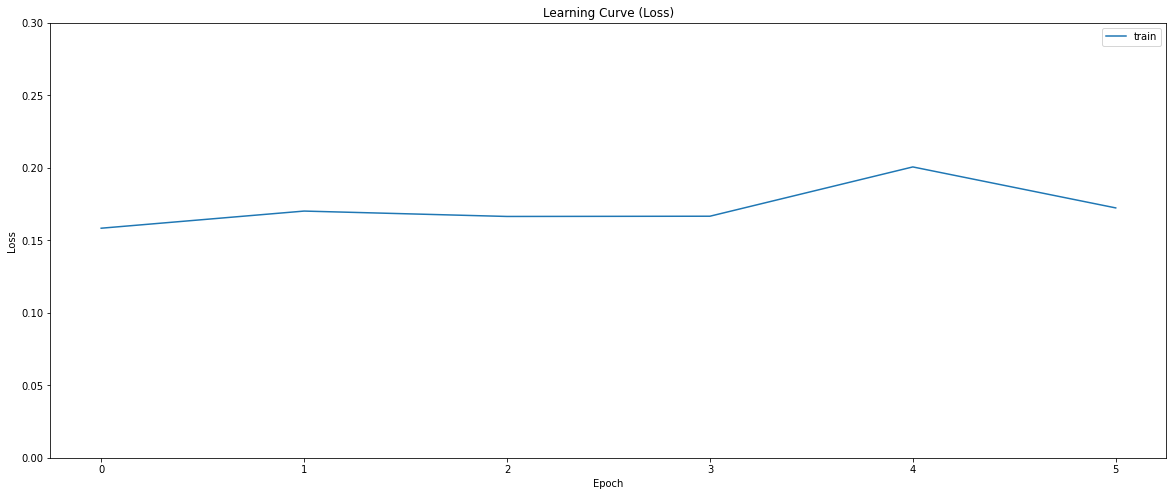

In [74]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
# sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.3)
ax.legend(['train', 'val'], loc='best')
plt.show()


In [75]:
score = model_pretrained.evaluate(ds_val, steps = len(df_val)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.146597757935524
Val accuracy: 0.9245283007621765


In [76]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5039374828338623
Test accuracy: 0.7644230723381042


Evaluate your model. Use valid evaluation metrics for it. Analyze the results. (evaluation metrics: 5 points, analysis: 5 points, logical results: 5 points)

In [77]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [78]:
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [79]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

Test Accuracy:  0.7644230769230769


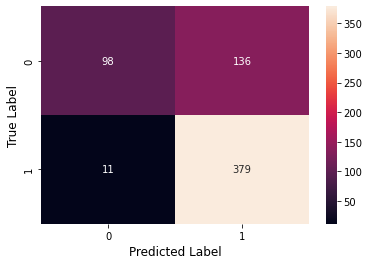

In [80]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()



In [81]:
print(classification_report(Y_test, pred_labels, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.90      0.42      0.57       234
   Normal (Class 1)       0.74      0.97      0.84       390

           accuracy                           0.76       624
          macro avg       0.82      0.70      0.70       624
       weighted avg       0.80      0.76      0.74       624



it shows that this model can find class 1 data very well but in predicting label class 0 gets problem. this problem was normal because of imbalance class and overfit problem. so in next part we try to solve it with upsampling solution.

# C) Data balancing (5 points)

Explain what you can do to balance the data (if it is imbalanced) or avoid overfitting. (2 points)

As we say in last part, the model overfit on class 1. to avoid it there is 2 solution : 1) up sampling 2) over sampling.
We know that medical imaging is expensive and each sample is important for us so over sampling and remove sample is not good solution.
In this part we randomly choose data from normal class and add it to train data to give more focus in loss on class 0.

Implement your idea. (3 points)

In [93]:
print(len(train_normal))
print(len(train_pneumonia))

1341
3875


In [95]:
import random
# Set a length of the list to 10
len_train_normal = len(train_normal)
for i in range(len(train_pneumonia)-len_train_normal):
    # any random numbers from 0 to 1000
    upsample_index = (random.randint(0,len_train_normal))
    train_normal.append(train_normal[upsample_index])

In [96]:
print(len(train_normal))
print(len(train_pneumonia))

3875
3875


and after this part rerun all the training procedure from the begining

# D) Interpretation (15 points)


Read about interpretability. Describe what the interpretation of the neural networks is. (5 points)

Interpretability means try to understand what our convolutional neural network (black box) sees and understands when making a decisionand while learning, in other word it trys to get some view from model (in shape of image like heatmap or some photos wich activate some neuron or a batch of related word ) to know exactly what did model learn and from what it just choose a specific class or result. it will help us to understand the extracted features and to keep tracking of the training procedure .

Read about interpretation methods in this [paper](https://arxiv.org/abs/1710.10547) or any other resources. Decide which interpretation method you will use, and explain it. (5 points)

The base idea of all method  is to use gradient of convolution network to understand wich part will affect more and will have bigger gradient and as result, will have bigger impact while training the model.
In this project we choose Grad-CAM to deep into the model.

Gradient-weighted Class Activation Mapping (Grad-CAM), uses the gradients of any target concept flowing into the final convolutional layer to produce a coarse localization map highlighting the important regions in the image for predicting the concept.

The technique is an improvement over previous approaches in versatility and accuracy. It is complex but, luckily, the output is intuitive. From a high-level, we take an image as input and create a model that is cut off at the layer for which we want to create a Grad-CAM heat-map. We attach the fully-connected layers for prediction. We then run the input through the model, grab the layer output, and loss. Next, we find the gradient of the output of our desired model layer. From there, we take sections of the gradient which contribute to the prediction, reduce, resize, and rescale so that the heat-map can be overlaid with the original image.

Implement the method and visualize the output of 10 input images. You may use any available libraries for this matter. You may want to check out [this link](https://github.com/sicara/tf-explain). (5 points)

In [98]:
ds_train.next()

(array([[[[0.11334513, 0.11334513, 0.11334513],
          [0.10689903, 0.10689903, 0.10689903],
          [0.10669588, 0.10669588, 0.10669588],
          ...,
          [0.25726944, 0.25726944, 0.25726944],
          [0.26839644, 0.26839644, 0.26839644],
          [0.26561803, 0.26561803, 0.26561803]],
 
         [[0.11027384, 0.11027384, 0.11027384],
          [0.10601653, 0.10601653, 0.10601653],
          [0.10588236, 0.10588236, 0.10588236],
          ...,
          [0.27924988, 0.27924988, 0.27924988],
          [0.27974498, 0.27974498, 0.27974498],
          [0.28342888, 0.28342888, 0.28342888]],
 
         [[0.10594255, 0.10594255, 0.10594255],
          [0.09630746, 0.09630746, 0.09630746],
          [0.09600381, 0.09600381, 0.09600381],
          ...,
          [0.3004599 , 0.3004599 , 0.3004599 ],
          [0.30401382, 0.30401382, 0.30401382],
          [0.3079303 , 0.3079303 , 0.3079303 ]],
 
         ...,
 
         [[0.1679909 , 0.1679909 , 0.1679909 ],
          [0.15720

In [ ]:
# %%
from utils import vgg16_mura_model, preprocess_image, show_imgwithheat
from gradcam import grad_cam, grad_cam_plus

# %% load the model
model = vgg16_mura_model()
model.summary()

img = ds_train.next()
data = ([img], None)
# Start explainer
explainer = GradCAM()
grid = explainer.explain(data, model, class_index=ds_train.labels[0])  # 281 is the tabby cat index in ImageNet

explainer.save(grid, ".", "grad_cam.png")
# %% result of grad cam
heatmap = grad_cam(model, img,
                   label_name = [0,1],
                   #category_id = 0,
                   )
show_imgwithheat(img_path, heatmap)

# %% result of grad cam++
heatmap_plus = grad_cam_plus(model, img)
show_imgwithheat(img_path, heatmap_plus)

In [100]:
from tensorflow.keras.models import Model



def GradCam(model, img_array, layer_name, eps=1e-8):
    '''
    Creates a grad-cam heatmap given a model and a layer name contained with that model
    

    Args:
      model: tf model
      img_array: (img_width x img_width) numpy array
      layer_name: str


    Returns 
      uint8 numpy array with shape (img_height, img_width)

    '''

    gradModel = Model(
			inputs=[model.inputs],
			outputs=[model.get_layer(layer_name).output,
				model.output])
    
    with tf.GradientTape() as tape:
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
      inputs = tf.cast(img_array, tf.float32)
      (convOutputs, predictions) = gradModel(inputs)
      loss = predictions[:, 0]
		# use automatic differentiation to compute the gradients
    grads = tape.gradient(loss, convOutputs)
    
    # compute the guided gradients
    castConvOutputs = tf.cast(convOutputs > 0, "float32")
    castGrads = tf.cast(grads > 0, "float32")
    guidedGrads = castConvOutputs * castGrads * grads
		# the convolution and guided gradients have a batch dimension
		# (which we don't need) so let's grab the volume itself and
		# discard the batch
    convOutputs = convOutputs[0]
    guidedGrads = guidedGrads[0]
    # compute the average of the gradient values, and using them
		# as weights, compute the ponderation of the filters with
		# respect to the weights
    weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
    cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
  
    # grab the spatial dimensions of the input image and resize
		# the output class activation map to match the input image
		# dimensions
    (w, h) = (img_array.shape[2], img_array.shape[1])
    heatmap = cv2.resize(cam.numpy(), (w, h))
		# normalize the heatmap such that all values lie in the range
		# [0, 1], scale the resulting values to the range [0, 255],
		# and then convert to an unsigned 8-bit integer
    numer = heatmap - np.min(heatmap)
    denom = (heatmap.max() - heatmap.min()) + eps
    heatmap = numer / denom
    # heatmap = (heatmap * 255).astype("uint8")
		# return the resulting heatmap to the calling function
    return heatmap


def sigmoid(x, a, b, c):
    return c / (1 + np.exp(-a * (x-b)))

def superimpose(img_bgr, cam, thresh, emphasize=False):
    
    '''
    Superimposes a grad-cam heatmap onto an image for model interpretation and visualization.
    

    Args:
      image: (img_width x img_height x 3) numpy array
      grad-cam heatmap: (img_width x img_width) numpy array
      threshold: float
      emphasize: boolean

    Returns 
      uint8 numpy array with shape (img_height, img_width, 3)

    '''
    heatmap = cv2.resize(cam, (img_bgr.shape[1], img_bgr.shape[0]))
    if emphasize:
        heatmap = sigmoid(heatmap, 50, thresh, 1)
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    
    hif = .8
    superimposed_img = heatmap * hif + img_bgr
    superimposed_img = np.minimum(superimposed_img, 255.0).astype(np.uint8)  # scale 0 to 255  
    superimposed_img_rgb = cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)
    
    return superimposed_img_rgb

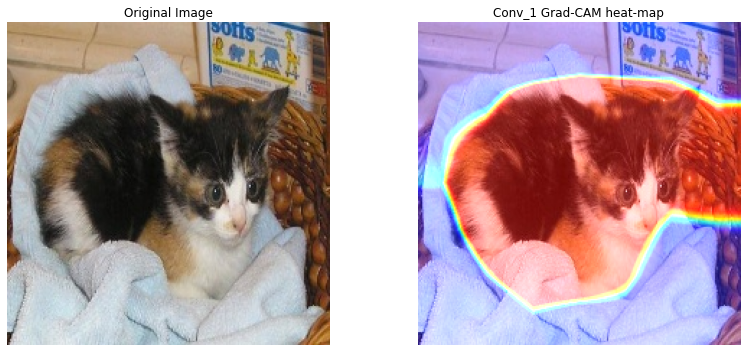

In [ ]:
## Grad-CAM heatmap for the last convolutional layer in the model, Conv_1

layer_name = ' input_1'
img = ds_test.next()
label = ds_test.labels[0]
grad_cam=GradCam(model_pretrained,np.expand_dims(img, axis=0),layer_name)
grad_cam_superimposed = superimpose(img, grad_cam, 0.5, emphasize=True)


plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')
ax = plt.subplot(1, 2, 2)
plt.imshow(grad_cam_superimposed)
plt.axis('off')
plt.title('Conv_1 Grad-CAM heat-map')
plt.tight_layout()




# Resources

I use this link to solve practical question :
https://www.kaggle.com/code/hossamgalal68/chest-x-ray-pneumonia-with-cnn

for Interpretability part i use this blog :
https://towardsdatascience.com/understand-your-algorithm-with-grad-cam-d3b62fce353